<h1>Week 01. Text Data Essentials<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-01.-Introduction-to-Text-Data" data-toc-modified-id="Week-01.-Introduction-to-Text-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 01. Introduction to Text Data</a></span></li><li><span><a href="#Loading-and-Inspecting-Data-with-Pandas" data-toc-modified-id="Loading-and-Inspecting-Data-with-Pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Inspecting Data with Pandas</a></span><ul class="toc-item"><li><span><a href="#Iterating-over-documents-in-a-dataframe" data-toc-modified-id="Iterating-over-documents-in-a-dataframe-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Iterating over documents in a dataframe</a></span></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Saving data</a></span></li></ul></li><li><span><a href="#Web-Scraping" data-toc-modified-id="Web-Scraping-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Web Scraping</a></span><ul class="toc-item"><li><span><a href="#Downloading-URL's" data-toc-modified-id="Downloading-URL's-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Downloading URL's</a></span></li><li><span><a href="#Parsing-HTML" data-toc-modified-id="Parsing-HTML-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Parsing HTML</a></span></li><li><span><a href="#Removing-unicode-characters" data-toc-modified-id="Removing-unicode-characters-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Removing unicode characters</a></span></li></ul></li><li><span><a href="#Quantity-of-Text" data-toc-modified-id="Quantity-of-Text-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quantity of Text</a></span></li><li><span><a href="#Dictionary-/-Matching-Methods" data-toc-modified-id="Dictionary-/-Matching-Methods-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dictionary / Matching Methods</a></span><ul class="toc-item"><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sentiment Analysis</a></span></li><li><span><a href="#Sentiment-Analysis-with-Huggingface" data-toc-modified-id="Sentiment-Analysis-with-Huggingface-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sentiment Analysis with Huggingface</a></span></li><li><span><a href="#StopWords" data-toc-modified-id="StopWords-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>StopWords</a></span></li><li><span><a href="#RegEx" data-toc-modified-id="RegEx-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>RegEx</a></span></li><li><span><a href="#WordNet" data-toc-modified-id="WordNet-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>WordNet</a></span></li></ul></li></ul></div>

# Week 01. Introduction to Text Data

Natural Language Processing for Law and Social Science<br>
Elliott Ash, NYU

In [1]:
# set random seed
import numpy as np
np.random.seed(4)

# Loading and Inspecting Data with Pandas

In [14]:
# If you are using Google Colab, here's the code to load the zip file from local. 
# Or you can load from other source, see: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from google.colab import files
uploaded = files.upload()

Saving sc_cases.zip to sc_cases.zip


In [2]:
#import warnings; warnings.simplefilter('ignore')
# !pip install pandas
import pandas as pd
df = pd.read_csv('sc_cases.zip',compression='gzip')

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_name       786 non-null    str    
 1   opinion_type    820 non-null    str    
 2   date_standard   820 non-null    str    
 3   authorship      820 non-null    str    
 4   x_republican    803 non-null    float64
 5   maj_judges      786 non-null    str    
 6   dissent_judges  786 non-null    str    
 7   topic_id        786 non-null    float64
 8   cite_count      812 non-null    float64
 9   opinion_text    820 non-null    str    
dtypes: float64(3), str(7)
memory usage: 64.2 KB


In [4]:
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...
3,NaN,majority,2005-04-15,KENNEDY,1.0,NaN,NaN,NaN,6.0,"Justice Kennedy, Circuit Justice. \n\n This is..."
4,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...


In [5]:
# drop missing
df = df.dropna()
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...
4,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...
5,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...


In [6]:
# Number of label categories (e.g. judges)
df['authorship'].describe()

count        781
unique        27
top       SCALIA
freq          86
Name: authorship, dtype: object

In [7]:
# tabulations of label categories 
df['authorship'].value_counts()

authorship
SCALIA                                           86
GINSBURG                                         81
KENNEDY                                          79
THOMAS                                           79
BREYER                                           73
STEVENS                                          72
SOUTER                                           72
O'CONNOR                                         52
REHNQUIST                                        49
ROBERTS                                          28
ALITO                                            23
Breyer                                           12
Roberts                                          10
Alito                                             9
Ginsburg                                          8
Thomas                                            8
Scalia                                            8
Kennedy                                           7
Stevens                                           7
S

In [8]:
df['authorship'] = df['authorship'].str.upper()

In [9]:
df['authorship'].value_counts()

authorship
SCALIA                                           94
GINSBURG                                         89
THOMAS                                           87
KENNEDY                                          86
BREYER                                           85
STEVENS                                          79
SOUTER                                           77
O'CONNOR                                         52
REHNQUIST                                        49
ROBERTS                                          38
ALITO                                            32
SOTOMAYOR                                         7
STEVENS  AND  O'CONNOR ;  REHNQUIST ;  BREYER     2
STEVENS  (IN PART),  BREYER  (IN PART)            1
JUSTICE  ALITO                                    1
BREYER ;                                          1
ROBERTS ,  SCALIA ,  THOMAS ,  ALITO              1
Name: count, dtype: int64

In [10]:
# keep all judges through ALITO
keep_judges = df['authorship'].value_counts().index[:11]
print(keep_judges)

Index(['SCALIA', 'GINSBURG', 'THOMAS', 'KENNEDY', 'BREYER', 'STEVENS',
       'SOUTER', 'O'CONNOR', 'REHNQUIST', 'ROBERTS', 'ALITO'],
      dtype='str', name='authorship')


In [11]:
df = df[df['authorship'].isin(keep_judges)]
df['authorship'].value_counts()

authorship
SCALIA       94
GINSBURG     89
THOMAS       87
KENNEDY      86
BREYER       85
STEVENS      79
SOUTER       77
O'CONNOR     52
REHNQUIST    49
ROBERTS      38
ALITO        32
Name: count, dtype: int64

In [12]:
df.date_standard

0      2003-03-04
1      2003-06-09
2      2005-03-30
4      2005-06-06
5      2005-06-13
          ...    
815    2001-04-18
816    2001-04-24
817    2001-04-24
818    2001-05-14
819    2001-05-14
Name: date_standard, Length: 768, dtype: str

In [13]:
df['date_standard'] = pd.to_datetime(df['date_standard'])
df['date_standard']

0     2003-03-04
1     2003-06-09
2     2005-03-30
4     2005-06-06
5     2005-06-13
         ...    
815   2001-04-18
816   2001-04-24
817   2001-04-24
818   2001-05-14
819   2001-05-14
Name: date_standard, Length: 768, dtype: datetime64[us]

In [14]:
df['year'] = df['date_standard'].dt.year
df['year'].value_counts()

year
2001    77
2000    76
2009    74
2002    74
2004    73
2003    70
2005    70
2007    65
2010    64
2006    63
2008    62
Name: count, dtype: int64

<Axes: >

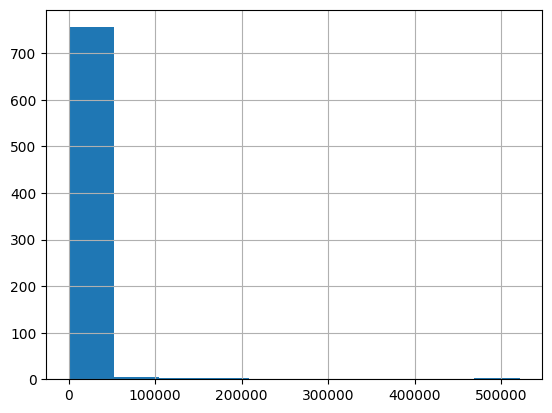

In [15]:
import matplotlib
df['cite_count'].hist()

<Axes: >

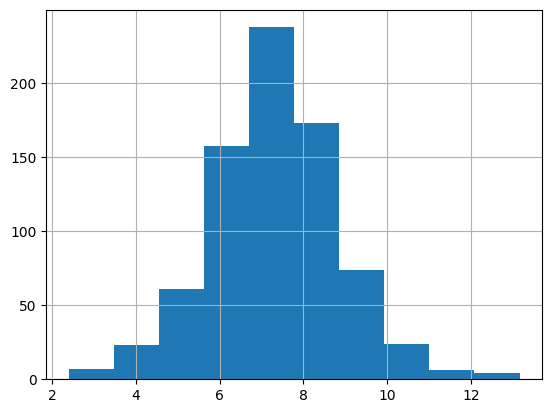

In [16]:
import numpy as np
df['log_cite_count'] = np.log(df['cite_count'])
df['log_cite_count'].hist()

Save what we have done so far.

In [17]:
df.to_pickle('sc_cases_cleaned.pkl',compression='gzip')
print(df)

                                             case_name opinion_type  \
0                  ERICK CORNELL CLAY v. UNITED STATES     majority   
1    HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...     majority   
2      CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN     majority   
4          STATE OF ALASKA v. UNITED STATES OF AMERICA     majority   
5    REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...     majority   
..                                                 ...          ...   
815  MICHAEL F. EASLEY, * GOVERNOR OF NORTH CAROLIN...     majority   
816  GAIL ATWATER, et al. v. CITY OF LAGO VISTA et al.     majority   
817  JAMES ALEXANDER, DIRECTOR, ALABAMA DEPARTMENT ...     majority   
818  UNITED STATES v. OAKLAND CANNABIS BUYERS' COOP...     majority   
819                     WILBERT K. ROGERS v. TENNESSEE     majority   

    date_standard authorship  x_republican  \
0      2003-03-04   GINSBURG           0.0   
1      2003-06-09    STEVENS           1.0   
2      20

## Iterating over documents in a dataframe

In the following, we show how to iterate over a dataframe and three different ways of how to tokenize documents.

In [18]:
import spacy
# more infos at https://spacy.io/
nlp = spacy.load('en_core_web_sm')

C:\Users\Dell\Documents\GitHub\tad-2026\notebooks\textasdata_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df.iterrows():
    if i >= 10:
        break
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = nlp(text) # get sentences/tokens
    processed[docid] = document # add to dictionary    

In [20]:
# first and second opinions
print ("opinion 1:", processed[0][:50], "\n\n", "opinion 2:", processed[1][:50])

opinion 1: JUSTICE GINSBURG delivered the opinion of the Court.

 A motion by a federal prisoner for postconviction relief under 28 U.S.C. § 2255 is subject to a one-year time limitation that generally runs from "the date on which the judgment of conviction becomes final." 

 opinion 2: Justice Stevens delivered the opinion of the Court. 

In most of the United States, not including California, the minimum price paid to dairy farmers producing raw milk is regulated pursuant to federal marketing orders.  Those orders guarantee a uniform price for the producers,


Let's see in more detail what information we can extract from documents procesesd using spaCy: 

In [21]:
for token in processed[0][:50]:
       print(token.text, token.pos_, token.dep_)

JUSTICE NOUN compound
GINSBURG PROPN nsubj
delivered VERB ROOT
the DET det
opinion NOUN dobj
of ADP prep
the DET det
Court PROPN pobj
. PUNCT punct


  SPACE dep
A DET det
motion NOUN nsubj
by ADP prep
a DET det
federal ADJ amod
prisoner NOUN pobj
for ADP prep
postconviction NOUN compound
relief NOUN pobj
under ADP prep
28 NUM nummod
U.S.C. PROPN compound
§ PROPN pobj
2255 NUM nummod
is AUX ROOT
subject ADJ acomp
to ADP prep
a DET det
one NUM nummod
- PUNCT punct
year NOUN compound
time NOUN compound
limitation NOUN pobj
that PRON nsubj
generally ADV advmod
runs VERB relcl
from ADP prep
" PUNCT punct
the DET det
date NOUN pobj
on ADP prep
which PRON pobj
the DET det
judgment NOUN nsubj
of ADP prep
conviction NOUN pobj
becomes VERB relcl
final ADJ acomp
. PUNCT punct
" PUNCT punct


alternatively, we can preprocess with gensim

In [22]:
from gensim.utils import simple_preprocess

processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df.iterrows():
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = simple_preprocess(text) # get sentences/tokens
    processed[docid] = document # add to dictionary    
    if i > 100:
        break
# first and second opinions
print ("opinion 1:", processed[0][:50], "\n\n", "opinion 2:", processed[1][:50]) # note how simple preprocess drops punctuation

opinion 1: ['justice', 'ginsburg', 'delivered', 'the', 'opinion', 'of', 'the', 'court', 'motion', 'by', 'federal', 'prisoner', 'for', 'postconviction', 'relief', 'under', 'is', 'subject', 'to', 'one', 'year', 'time', 'limitation', 'that', 'generally', 'runs', 'from', 'the', 'date', 'on', 'which', 'the', 'judgment', 'of', 'conviction', 'becomes', 'final', 'this', 'case', 'concerns', 'the', 'starting', 'date', 'for', 'the', 'one', 'year', 'limitation', 'it', 'presents'] 

 opinion 2: ['justice', 'stevens', 'delivered', 'the', 'opinion', 'of', 'the', 'court', 'in', 'most', 'of', 'the', 'united', 'states', 'not', 'including', 'california', 'the', 'minimum', 'price', 'paid', 'to', 'dairy', 'farmers', 'producing', 'raw', 'milk', 'is', 'regulated', 'pursuant', 'to', 'federal', 'marketing', 'orders', 'those', 'orders', 'guarantee', 'uniform', 'price', 'for', 'the', 'producers', 'but', 'through', 'pooling', 'mechanisms', 'require', 'the', 'processors', 'of']


or with nltk

In [23]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df.iterrows():
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = word_tokenize(text.lower()) # get sentences/tokens
    processed[docid] = document # add to dictionary    
    if i > 100:
        break
# first and second opinions
print ("opinion 1:", processed[0][:50], "\n\n", "opinion 2:", processed[1][:50]) # note that we just tokenize and keep all tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


opinion 1: ['justice', 'ginsburg', 'delivered', 'the', 'opinion', 'of', 'the', 'court', '.', 'a', 'motion', 'by', 'a', 'federal', 'prisoner', 'for', 'postconviction', 'relief', 'under', '28', 'u.s.c', '.', '§', '2255', 'is', 'subject', 'to', 'a', 'one-year', 'time', 'limitation', 'that', 'generally', 'runs', 'from', '``', 'the', 'date', 'on', 'which', 'the', 'judgment', 'of', 'conviction', 'becomes', 'final', '.', "''", '§', '2255'] 

 opinion 2: ['justice', 'stevens', 'delivered', 'the', 'opinion', 'of', 'the', 'court', '.', 'in', 'most', 'of', 'the', 'united', 'states', ',', 'not', 'including', 'california', ',', 'the', 'minimum', 'price', 'paid', 'to', 'dairy', 'farmers', 'producing', 'raw', 'milk', 'is', 'regulated', 'pursuant', 'to', 'federal', 'marketing', 'orders', '.', 'those', 'orders', 'guarantee', 'a', 'uniform', 'price', 'for', 'the', 'producers', ',', 'but', 'through']


## Saving data

In [24]:
# save as python pickle
pd.to_pickle(processed, 'processed_corpus.pkl')
# delete it
import os 
os.remove('processed_corpus.pkl')

In [38]:
# Merging Data-frames Example
# Perform a left join:
# df_merged = pd.merge(df1,df2,on='id', how='left', validation='m:1')

# Web Scraping

## Downloading URL's

In [89]:
import urllib.request as urllib # Python's module for accessing web pages
url = 'https://www.example.com' # shortened URL for court case
page = urllib.urlopen(url) # open the web page

html = page.read() # read web page contents as a string
print(html[:400])  # print first 400 characters
print()
print(html[-400:]) # print last 400 characters
print()
print(len(html),'characters in string.')   # print length of string

b'<!doctype html><html lang="en"><head><title>Example Domain</title><meta name="viewport" content="width=device-width, initial-scale=1"><style>body{background:#eee;width:60vw;margin:15vh auto;font-family:system-ui,sans-serif}h1{font-size:1.5em}div{opacity:0.8}a:link,a:visited{color:#348}</style><body><div><h1>Example Domain</h1><p>This domain is for use in documentation examples without needing perm'

b'th, initial-scale=1"><style>body{background:#eee;width:60vw;margin:15vh auto;font-family:system-ui,sans-serif}h1{font-size:1.5em}div{opacity:0.8}a:link,a:visited{color:#348}</style><body><div><h1>Example Domain</h1><p>This domain is for use in documentation examples without needing permission. Avoid use in operations.<p><a href="https://iana.org/domains/example">Learn more</a></div></body></html>\n'

513 characters in string.


## Parsing HTML

In [87]:
%pip install -U beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [91]:
# Parse raw HTML
# !pip install beautifulsoup4
from bs4 import BeautifulSoup # package for parsing HTML
soup = BeautifulSoup(html) # parse html of web page
print(soup.title) # example usage: print title item

<title>Example Domain</title>


In [92]:
# extract text
text = soup.get_text() # get text (remove HTML markup)
lines = text.splitlines() # split string into separate lines
print(len(lines)) # print number of lines

1


In [93]:
lines = [line for line in lines if line != ''] # drop empty lines
print(len(lines)) # print number of lines

1


In [94]:
print(lines[:20]) # print first 20 lines

['Example DomainExample DomainThis domain is for use in documentation examples without needing permission. Avoid use in operations.Learn more']


## Removing unicode characters

In [44]:
!pip install unidecode
from unidecode import unidecode # package for removing unicode
uncode_str = 'Visualizations\xa0'
fixed = unidecode(uncode_str) # example usage
print([uncode_str],[fixed]) # print cleaned string (replaced with a space)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['Visualizations\xa0'] ['Visualizations ']


# Quantity of Text

Count words per document.

<Axes: >

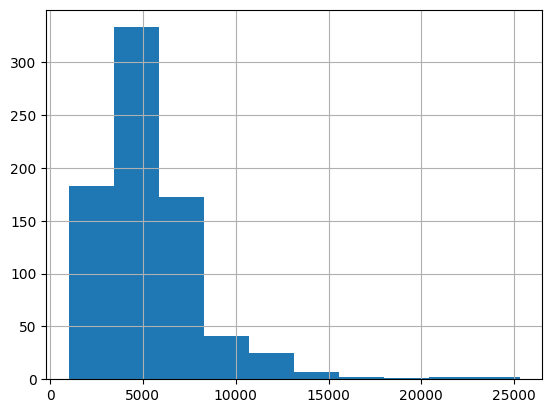

In [25]:
def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split()) 

# apply to our dataframe
df['num_words'] = df['opinion_text'].apply(get_words_per_doc)
df['num_words'].hist()

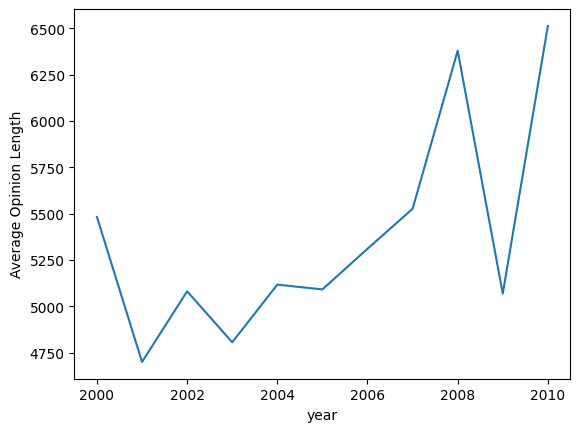

In [26]:
# plot length by year
ax = df.groupby('year')['num_words'].mean().plot()
ax.set_ylabel('Average Opinion Length')
import matplotlib.pyplot as plt
plt.show()

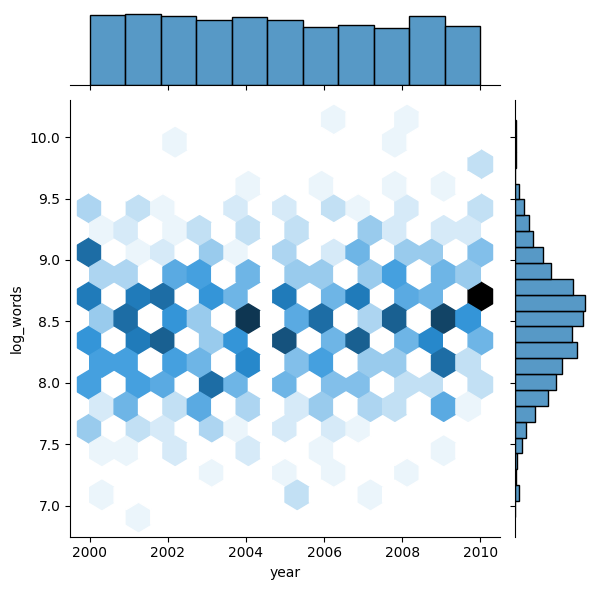

In [27]:
df['log_words'] = np.log(df['num_words'])
import seaborn as sns
sns.jointplot(data=df,x='year', y='log_words',kind='hex')

Build a frequency distribution over words with `Counter`.

In [28]:
from collections import Counter
freqs = Counter()
for i, row in df.iterrows():
    freqs.update(row['opinion_text'].lower().split())
    if i > 100:
        break
freqs.most_common()[:20] # can use most frequent words as style/function words

[('the', 31600),
 ('of', 15978),
 ('to', 12330),
 ('a', 8954),
 ('that', 8521),
 ('in', 8324),
 ('and', 7619),
 ('at', 5044),
 ('for', 4496),
 ('is', 4032),
 ('not', 3577),
 ('l.', 3216),
 ('ed.', 3190),
 ('as', 3048),
 ('or', 2904),
 ('s.', 2828),
 ('§', 2738),
 ('ct.', 2735),
 ('court', 2615),
 ('on', 2587)]

# Dictionary / Matching Methods

## Sentiment Analysis

In [29]:
#!pip install spacytextblob
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
print (spacy.__version__)

3.7.5


In [30]:
# Dictionary-Based Sentiment Analysis
nltk.download('vader_lexicon')

# textblob sentiment analysis: https://github.com/sloria/TextBlob
# pip install spacytextblob

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob


nlp = spacy.load('en_core_web_sm')
# spacy_text_blob = SpacyTextBlob()
nlp.add_pipe('spacytextblob')
doc = nlp(df.iloc[0]["opinion_text"])
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#sid = SentimentIntensityAnalyzer()
#polarity = sid.polarity_scores(text)
print("polarity", doc._.blob.polarity ) # sentimentintensityanalayzer nltk: {'neg': 0.134, 'neu': 0.785, 'pos': 0.081, 'compound': -0.9999}
print ("subjectivity", doc._.blob.subjectivity)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


polarity 0.05404135338345859
subjectivity 0.5065358709273183


In [31]:
# sample 10% of the dataset
dfs = df.sample(frac=.1) 
# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    #return sid.polarity_scores(snippet)['compound']
    return nlp(snippet)._.blob.polarity
dfs['sentiment'] = dfs['opinion_text'].apply(get_sentiment)

In [32]:
dfs.sort_values('sentiment',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['opinion_text']]

[' \n\n This case presents the question whether uses of patented inventions in preclinical research, the',
 't. \n\n This case requires us to decide whether the use of race as a factor in student admissions by t',
 ' \n\n  The State of Washington prohibits labor unions from using the agency-shop fees of a nonmember f',
 ' \n\n The question is whether the provision of the Fair Labor Standards Act of 1938 (FLSA or Act), tha',
 "t. \n\n We granted certiorari to resolve whether the Nevada Supreme Court's refusal to extend full fai"]

In [33]:
# print beginning of most negative documents
[x[50:150] for x  in dfs[:5]['opinion_text']]

['\n\nThe False Claims Act (FCA) imposes civil liability on any person who knowingly uses a "false recor',
 ' \n\nWhen an alien is found ineligible to remain in the United States, the process for selecting the c',
 'he Court. \n\n Petitioner Josue Leocal, a Haitian citizen who is a lawful permanent resident of the Un',
 " \n\n Respondent Arturo Recuenco was convicted of assault in the second degree based on the jury's fin",
 'he Court. \n\n InTotten v. United States,92 U.S. 105, 23 L. Ed. 605 (1876), we held that public policy']

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# sample 20% of the dataset
dfs = df.sample(frac=.1)

# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    return sid.polarity_scores(snippet)['compound']
dfs['sentiment_vader'] = dfs['opinion_text'].apply(get_sentiment)
dfs.sort_values('sentiment_vader',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['opinion_text']]

[' Court. \n\n  Under the Internal Revenue Code, individuals may subtract from their adjusted gross inco',
 't and delivered an opinion, in which Justice Souter, Justice Ginsburg, and Justice Breyer join. \n\n T',
 '.\n\nA citizen of Hawaii comes before us claiming that an explicit, race-based voting qualification ha',
 't and delivered the opinion of the Court with respect to Parts I, II, III, and VI, an opinion with r',
 't. \n\n  For private actions brought under 42 U.S.C. § 1983 and other specified measures designed to s']

## Sentiment Analysis with Huggingface 

In [35]:
#!pip install transformers
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer
pipe = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [36]:
from torch.utils.data import Dataset
from tqdm.auto import tqdm

class OpinionDataset(Dataset):
    def __init__(self, df):
        super().__init__()
        self.df = df
    def __len__(self):
        return len(df)

    def __getitem__(self, i):
        return df.iloc[i]["opinion_text"][:512] # BERT max seq length


dataset = OpinionDataset(df)
sentiments = []

for out in tqdm(pipe(dataset, batch_size=16), total=len(dataset)):
        if out['label'] == "NEGATIVE":
            sentiments.append(-1*out['score'])
        else:
            sentiments.append(out['score'])

100%|████████████████████████████████████████████████████████████████████████████████| 768/768 [01:04<00:00, 11.92it/s]


In [37]:
df['sentiments'] = sentiments

In [38]:
df.sort_values('sentiments',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in df[-5:]['opinion_text']]

['t. \n\n  The Federal Employees Liability Reform and Tort Compensation Act of 1988, commonly known as t',
 ' \n\n The authority of the Courts of Appeals to review "all final decisions of the district courts," 2',
 '. \n\n The question before us is whether the Controlled Substances Act allows the United States Attorn',
 ' Court.\n\n"To be prepared for war is one of the most effectual means of preserving peace." 1 Messages',
 ' Court. \n\nDNA testing has an unparalleled ability both to exonerate the wrongly convicted and to ide']

In [39]:
# print beginning of most negative documents
[x[50:150] for x  in df[:5]['opinion_text']]

[' Court. \n\nBad things happen if you fail to pay federal income taxes when due. One of them is that in',
 't.\n\nPetitioner, a nonnamed member of a class certified under Federal Rule of Civil Procedure 23(b)(1',
 't.\n\nPetitioner Remon Lee asserts that a Missouri trial court deprived him of due process when the co',
 '.\n\nThe Americans with Disabilities Act of 1990 (ADA or Act),  104 Stat. 327, as amended, 42 U.S.C. §',
 't.\n\nThis case involves an action for damages against a railroad due to its alleged failure to mainta']

## StopWords

In [40]:
#from nltk.corpus import stopwords
#stopwords = set(stopwords.words('english'))
#stopwords
from spacy.lang.en import stop_words
print(stop_words.STOP_WORDS)

{'ourselves', 'whole', 'after', 'because', 'yourselves', 'nevertheless', 'mine', "'m", 'off', 'has', 'front', 'should', 'yourself', 'various', 'each', 'ca', 'six', 'say', 'other', '‘ll', 'sometime', 'whence', 'have', 'whoever', 'few', 'however', '’re', 'part', 'throughout', 'call', 'than', 'had', 'was', 'any', 'using', 'some', 'below', 'therein', 'therefore', 'before', 'as', 'one', 'the', 'that', '’s', '‘m', 'whom', 'namely', "n't", 'take', 'perhaps', 'next', 'to', 'ever', 'how', 'anything', 'through', 'latter', 'me', 'around', 'regarding', 'and', 'rather', 'under', 'eight', 'though', 're', 'doing', "'s", 'there', 'together', 'these', 'too', 'they', 'full', 'again', 'our', 'both', 'once', 'thru', '’d', 'this', 'him', 'were', 'will', 'almost', 'elsewhere', 'wherein', 'just', 'often', 'n’t', 'every', 'her', 'first', 'name', 'its', 'also', 'although', 'same', 'ours', 'neither', 'somehow', 'for', 'from', 'when', 'beside', 'get', 'by', 'up', 'across', 'where', 'really', 'besides', 'n‘t', 'e

In [41]:
#stopfreq = np.sum([freqs[x] for x in stopwords])
#stopfreq # 174132 for NLTK stopwords
stopwords = stop_words.STOP_WORDS
stopfreq = np.sum([freqs[x] for x in stopwords])
stopfreq

191526

In [42]:
otherfreq = np.sum([freqs[x] for x in freqs if x not in stopwords])
otherfreq

306516

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

In [43]:
import re

docs = dfs[:5]['opinion_text']

# Extract words after justice.
for doc in docs:    
    print(re.findall(r'Justice \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['Justice Souter ']
['Justice Breyer ']
['Justice Stevens ']
['Justice Souter ', 'Justice Ginsburg ', 'Justice Scalia ', 'Justice Ginsburg ']
['Justice Alito ']


In [44]:
# Extract hyphenated words
for doc in docs:    
    print(re.findall(r'[a-z]+-[a-z]+', 
                     doc,            
                     re.IGNORECASE))  

['eight-level', 'immigration-enforcement', 'Yanez-Garcia', 'Briones-Mata', 'state-law', 'Hinojosa-Lopez', 'Briones-Mata', 'Cabrera-Sosa', 'Restrepo-Aguilar', 'Gonzales-Gomez', 'state-law', 'Palacios-Suarez', 'Ibarra-Galindo', 'state-law', 'Pornes-Garcia', 'Cazarez-Gutierrez', 'state-law', 'Urena-Ramirez', 'state-by', 'misdemeanor-felony', 'one-sided', 'misdemeanor-felony']
['fact-based', 'Arguelles-Olivares', 'Dulal-Whiteway', 'circumstance-specific', 'firearm-law', 'five-word', 'circumstance-specific', 'Estrada-Espinoza', 'circumstance-specific', 'circumstance-specific', 'circumstance-specific', 'tax-evasion', 'circumstance-specific', 'circumstance-specific', 'judge-approved', 'judge-made', 'sentencing-related']
['well-grounded', 'common-law', 'evil-meaning', 'evil-doing', 'reasonable-doubt', 'common-law', 'Burden-of', 'common-law', 'common-law', 'common-law', 'common-law', 'firearm-based', 'common-law', 'long-established', 'common-law', 'well-settled', 'by-then', 'common-law', 'post-

In [45]:
# extract citations
for i, doc in enumerate(docs):
    finder = re.finditer('\d+ [^\s]+ \d+', # pattern to match ([^\s] means non-white-space)
                     doc)            # string
    for m in finder: 
        print(i, m.span(),m.group()) # location (start,end) and matching string

0 (568, 582) 102 Stat. 4469
0 (612, 626) 108 Stat. 4320
0 (2025, 2037) 2 (Nov. 2005
0 (2498, 2511) 1 (Supp. 1997
0 (2831, 2843) 543 U.S. 371
0 (3882, 3894) 116 F.3d 308
0 (4139, 4151) 417 F.3d 934
0 (4728, 4740) 316 F.3d 506
0 (4820, 4833) 168 F.3d 1271
0 (4887, 4899) 130 F.3d 691
0 (4950, 4962) 116 F.3d 308
0 (5025, 5036) 81 F.3d 998
0 (5092, 5103) 74 F.3d 361
0 (5153, 5165) 441 F.3d 532
0 (5259, 5271) 418 F.3d 692
0 (5310, 5322) 280 F.3d 297
0 (5520, 5533) 206 F.3d 1337
0 (5641, 5653) 171 F.3d 142
0 (5709, 5721) 382 F.3d 905
0 (5818, 5829) 79 F.3d 315
0 (5848, 5861) 547 U.S. 1054
0 (6713, 6725) 174 F.3d 580
0 (6727, 6740) 582 (CA5 1999
0 (7268, 7281) 21 U.S.C. 801
0 (8043, 8055) 510 U.S. 471
0 (8356, 8367) 341 F.3d 51
0 (8369, 8381) 57 (CA1 2003
0 (8459, 8473) 681 (App. 1996
0 (9014, 9026) 5 (2004), 22
0 (9082, 9096) 115 (West 2003
0 (9132, 9145) 35 (West 2003
0 (9895, 9905) 543 U.S. 1
0 (10275, 10292) 198 (Messner 1982
0 (12270, 12281) 464 U.S. 16
0 (14418, 14430) 540 U.S. 581
1 (10

In [46]:
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'



In [47]:
re.search(pattern1,'The White House tried to calm uncertainty in the markets.')

<re.Match object; span=(30, 41), match='uncertainty'>

In [48]:
re.search(pattern2,'The Congress tried to calm uncertainty in the economy.')

<re.Match object; span=(46, 53), match='economy'>

In [49]:
re.search(pattern3,'The Congress tried to calm uncertainty in the markets.')

In [50]:
re.search(pattern3,'The Congress tried to calm uncertainty in the markets.', re.IGNORECASE)

<re.Match object; span=(4, 12), match='Congress'>

In [51]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [52]:
indicates_uncertainty('The White House tried to calm uncertainty in the economy.')

True

In [53]:
indicates_uncertainty('The White House tried to calm uncertainty in the markets.')

False

In [54]:
df['uncertainty'] = df['opinion_text'].apply(indicates_uncertainty)

In [55]:
df.uncertainty.mean()

0.057291666666666664

<Axes: xlabel='year'>

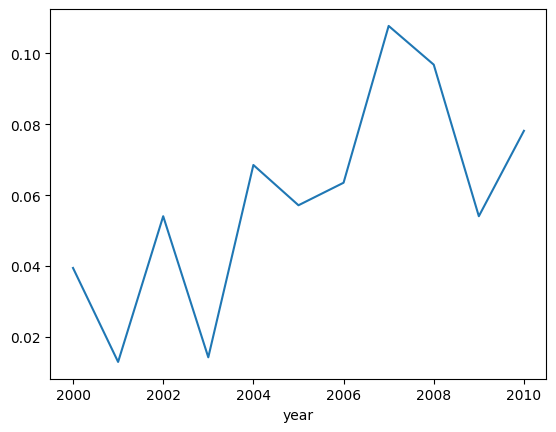

In [56]:
df.groupby('year')['uncertainty'].mean().plot()

## WordNet

These examples are based on the [NLTK tutorial](https://www.nltk.org/howto/wordnet.html).

In [57]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
nltk.download('omw-1.4')
wn.synsets('judge')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[Synset('judge.n.01'),
 Synset('evaluator.n.01'),
 Synset('judge.v.01'),
 Synset('evaluate.v.02'),
 Synset('estimate.v.01'),
 Synset('pronounce.v.02'),
 Synset('judge.v.05')]

In [59]:
wn.synsets('judge', pos='v') # can filter on part of speech

[Synset('judge.v.01'),
 Synset('evaluate.v.02'),
 Synset('estimate.v.01'),
 Synset('pronounce.v.02'),
 Synset('judge.v.05')]

In [60]:
judge = wn.synset('judge.n.01')
judge

Synset('judge.n.01')

In [61]:
judge.definition()

'a public official authorized to decide questions brought before a court of justice'

In [62]:
wn.synset('estimate.v.01').examples()

['I estimate this chicken to weigh three pounds']

In [63]:
# categories to which "judge.n.01" belongs
judge.hypernyms()

[Synset('official.n.01'), Synset('adjudicator.n.01')]

In [64]:
# the root category of "judge.n.01"
judge.root_hypernyms()

[Synset('entity.n.01')]

In [65]:
wn.synset('estimate.v.01').root_hypernyms()

[Synset('think.v.03')]

In [66]:
# members of the "judge.n.01" category
judge.hyponyms()

[Synset('alcalde.n.01'),
 Synset('trial_judge.n.01'),
 Synset('daniel.n.02'),
 Synset('doge.n.01'),
 Synset('justiciar.n.01'),
 Synset('trier.n.01'),
 Synset('recorder.n.03'),
 Synset('chief_justice.n.01'),
 Synset('praetor.n.01'),
 Synset('qadi.n.01'),
 Synset('ordinary.n.01'),
 Synset('magistrate.n.01')]

In [67]:
# "holonym" is a part of a whole
juror = wn.synset('juror.n.01')
juror.member_holonyms()

[Synset('jury.n.01')]

In [68]:
# can find "lowest common hypernyms":
judge.lowest_common_hypernyms(juror)

[Synset('person.n.01')]

In [69]:
# "lemmas" are specific senses of a specific word.
judge.lemmas()

[Lemma('judge.n.01.judge'),
 Lemma('judge.n.01.justice'),
 Lemma('judge.n.01.jurist')]

In [70]:
[lemma.name() for lemma in judge.lemmas()]

['judge', 'justice', 'jurist']

In [71]:
# lemmas have additional properties
judge_lemma = judge.lemmas()[0]
judge_lemma.derivationally_related_forms()

[Lemma('judicial.s.01.judicial'),
 Lemma('judicial.a.02.judicial'),
 Lemma('judicial.a.03.judicial'),
 Lemma('judgeship.n.01.judgeship'),
 Lemma('judge.v.05.judge'),
 Lemma('judge.v.05.adjudicate'),
 Lemma('decide.v.02.adjudicate')]

In [72]:
good = wn.synset('good.a.01').lemmas()[0]
good.antonyms()

[Lemma('bad.a.01.bad')]

In [73]:
# verb frames summarize the different semantic contexts that a verb can be used
judge_verb = wn.synset('estimate.v.01').lemmas()[4]
judge_verb.frame_strings()

['Somebody judge something', 'Somebody judge PP', 'Somebody judge that CLAUSE']

In [74]:
# measure similarity in the dictionary between words
judge.path_similarity(wn.synset('juror.n.01'))

0.1111111111111111

In [75]:
judge.path_similarity(wn.synset('cat.n.01'))

0.08333333333333333

In [76]:
# Wu-Palmer similarity.
judge.wup_similarity(juror)

0.5454545454545454

In [77]:
judge.wup_similarity(wn.synset('cat.n.01'))

0.5217391304347826

In [78]:
# Can iterate over all synsets; e.g., all nouns:
for synset in list(wn.all_synsets('n')):
    if 'judg' in str(synset):
        print(synset)

Synset('judgeship.n.01')
Synset('judgment.n.02')
Synset('value_judgment.n.01')
Synset('judgment.n.03')
Synset('confession_of_judgment.n.01')
Synset('default_judgment.n.01')
Synset('final_judgment.n.01')
Synset('judgment_in_personam.n.01')
Synset('judgment_in_rem.n.01')
Synset('judgment_of_dismissal.n.01')
Synset('judgment_on_the_merits.n.01')
Synset('summary_judgment.n.01')
Synset('judgment.n.06')
Synset('judgment.n.04')
Synset('prejudgment.n.01')
Synset('judgment.n.01')
Synset('judges.n.01')
Synset('back_judge.n.01')
Synset('field_judge.n.01')
Synset('judge.n.01')
Synset('judge_advocate.n.02')
Synset('judge_advocate.n.01')
Synset('judge_advocate_general.n.01')
Synset('line_judge.n.01')
Synset('side_judge.n.01')
Synset('trial_judge.n.01')
Synset('judgment_lien.n.01')
Synset('judgment_day.n.01')


**Exercise**. Use wordnet to expand the set of words in the Baker-Bloom-Davis dictionary and re-compute policy uncertainty scores by year. 